In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from src import image_metrics, utils
from src.Tile import Tile

# Filtering by aspect ratio

I am assuming that files that I am interested in - nice tiles with nothing else - are square. Of course, this filerting step is not enough on it's own, but it filters out some garbage.

There are chances that we will filter out some good images, but that's the risk I am willing to take.

I allow up to 10% leeway to capture images with captions and etc. I noticed that a lot of them had captions at the bottom, so later I crop image to be square from the upper left corner.

In [4]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/portuguese tile',
    'dataset/bing/handmade tile',
    'dataset/bing/hand painted tile',
]

Working on dataset/google/azulejo folder.
Aspect ratios of the images


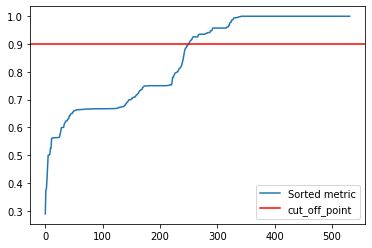

Random sample of rectangular files - they didn't make it.


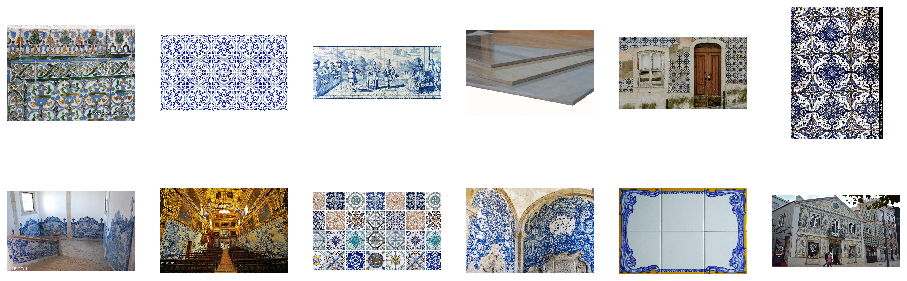

Random sample of square-ish files - they made it!


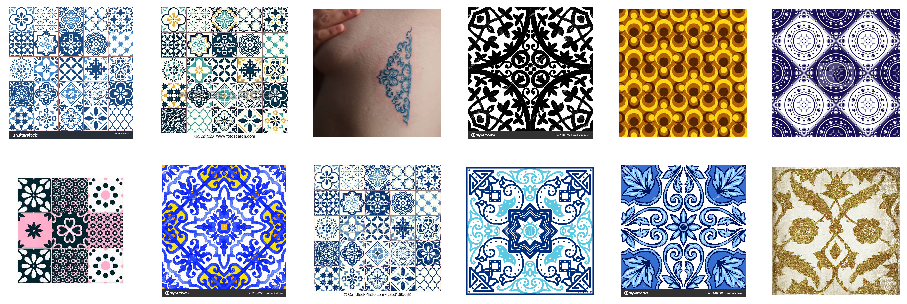

Total files: 532, out of them square-ish: 282.



Working on dataset/google/portuguese tiles folder.
Aspect ratios of the images


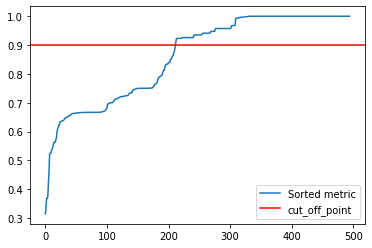

Random sample of rectangular files - they didn't make it.


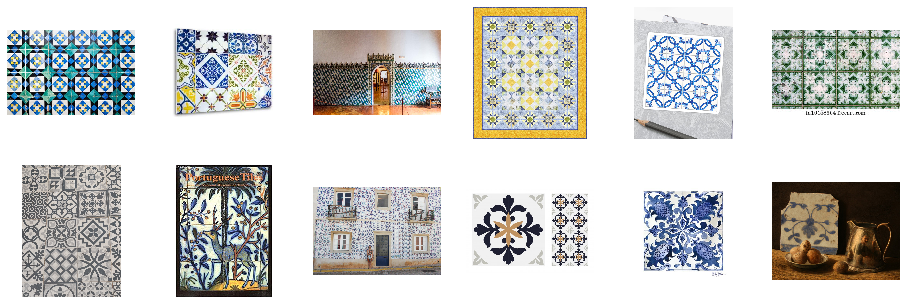

Random sample of square-ish files - they made it!


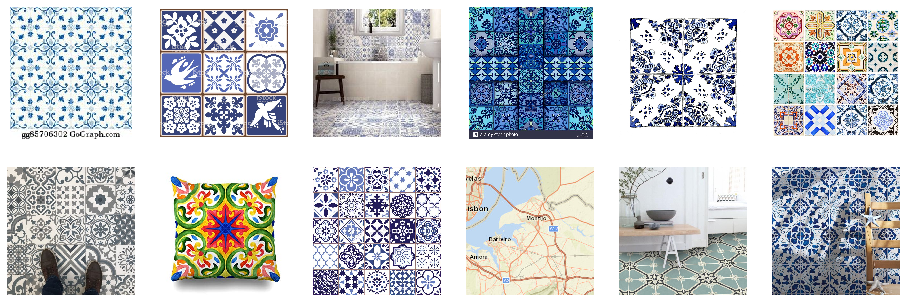

Total files: 495, out of them square-ish: 283.



Working on dataset/bing/azulejo folder.
Aspect ratios of the images


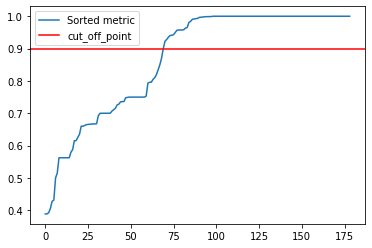

Random sample of rectangular files - they didn't make it.


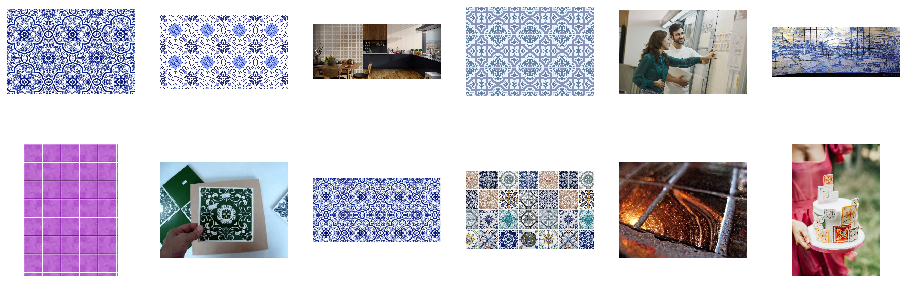

Random sample of square-ish files - they made it!


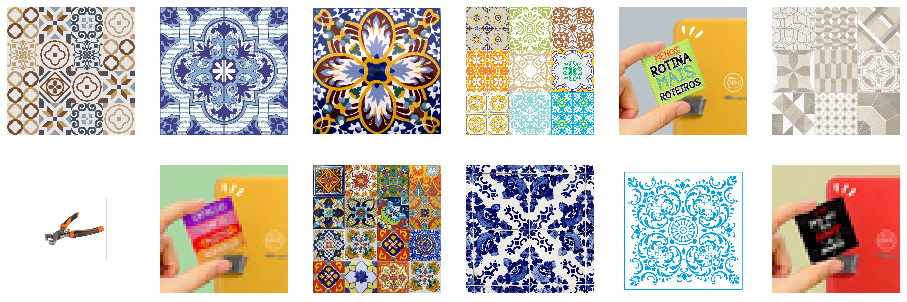

Total files: 179, out of them square-ish: 110.



Working on dataset/bing/handmade tile folder.
Aspect ratios of the images


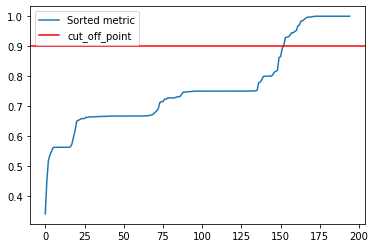

Random sample of rectangular files - they didn't make it.


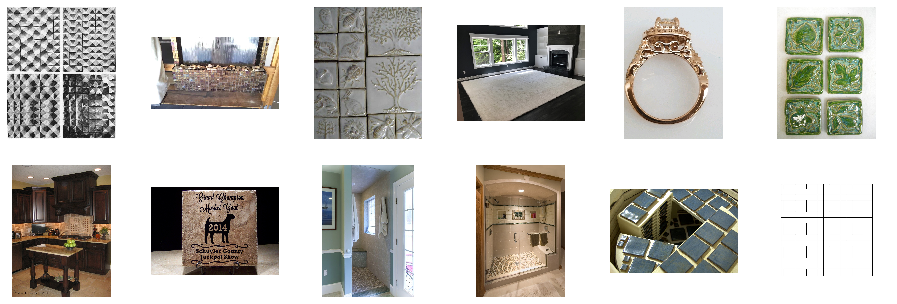

Random sample of square-ish files - they made it!


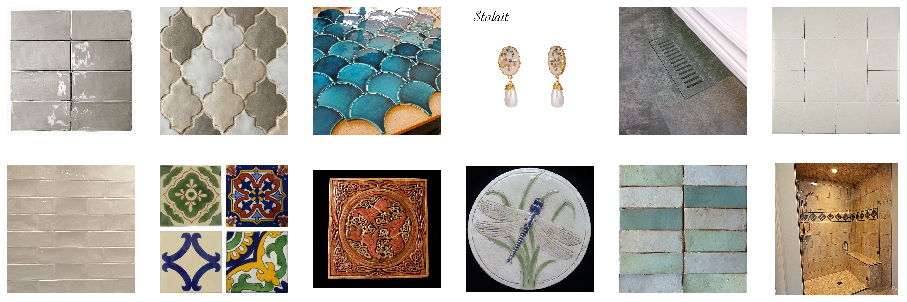

Total files: 195, out of them square-ish: 43.



Working on dataset/bing/portuguese tile folder.
Aspect ratios of the images


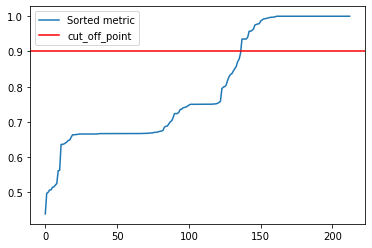

Random sample of rectangular files - they didn't make it.


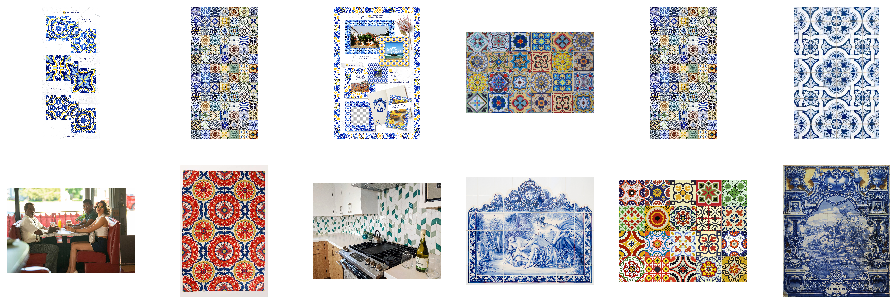

Random sample of square-ish files - they made it!


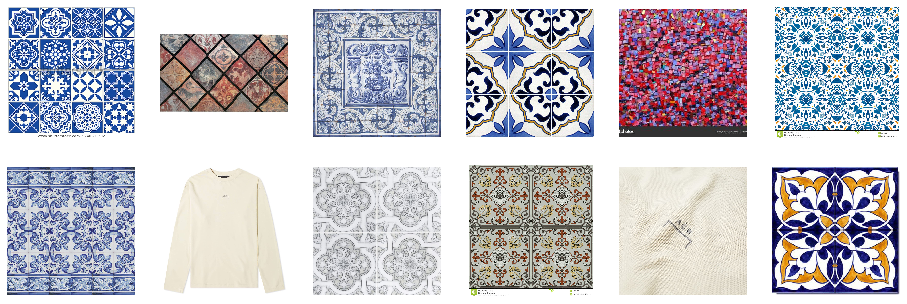

Total files: 213, out of them square-ish: 76.





In [11]:
plot_sample = 12
cut_off = 0.9

for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    files = [_ for _ in os.listdir(folder)  if _.endswith(".jpg")]
    
    imgs = utils.read_imgs(files, folder)
    aspect_ratios = list(map(image_metrics.aspect_ratio, imgs))
    
    sample_square = [_[0] for _ in zip(files, aspect_ratios) if _[1] >= cut_off]
    sample_rectangular = [_ for _ in files if _ not in sample_square]
    
    print('Aspect ratios of the images')
    utils.plot_metric(aspect_ratios, cut_off)
    
    print('Random sample of rectangular files - they didn\'t make it.')
    utils.plot_sample_files(sample_rectangular, folder=folder, plot_sample=min(plot_sample, len(sample_rectangular)))
    
    print('Random sample of square-ish files - they made it!')
    utils.plot_sample_files(sample_square, folder=folder, plot_sample=min(plot_sample, len(sample_square)))
    
    print('Total files: {}, out of them square-ish: {}.'.format(len(files), len(sample_square)))
    
    with open('lists/square_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
        for filename in sample_square:
            filehandle.write('%s\n' % filename)
            
    print('\n\n')